# Exploration of CIFAR100 dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
%matplotlib inline

## Load CIFAR100 dataset

In [2]:
X, Y_c, Y_f, Xt, Yt_c, Yt_f = utils.load_dataset()

Download complete.
Extracting files...
Extraction successfully done to ./data\cifar-100-python.


## Explore training and test sets

In [3]:
train_input_shape = X.shape
test_input_shape = Xt.shape
print('Training data input shape: {}'.format(train_input_shape))
print('Testing data input shape: {}'.format(test_input_shape))

Training data input shape: (50000, 32, 32, 3)
Testing data input shape: (10000, 32, 32, 3)


In [4]:
m_train = train_input_shape[0]
m_test = test_input_shape[0]
print('Number of training examples: {}'.format(m_train))
print('Number of testing examples: {}'.format(m_test))
image_shape = X.shape[1:]
print('Shape of input images: {}'.format(image_shape))

Number of training examples: 50000
Number of testing examples: 10000
Shape of input images: (32, 32, 3)


In [6]:
print('Training coarse labelled data shape: {}'.format(Y_c.shape))
print('Test fine labelled data shape: {}'.format(Yt_f.shape))

Training coarse labelled data shape: (50000,)
Test fine labelled data shape: (10000,)


## Load coarse and fine label names

In [10]:
coarse_label_names, fine_label_names = utils.load_label_names()
n_c = len(coarse_label_names)
n_f = len(fine_label_names)
print('Number of coarse label categories: {}'.format(n_c))
print('Number of fine label categories: {}'.format(n_f))
print('Index of coarse labels:')
print(sorted(set(Yt_c)))
print('Index of fine labels:')
print(sorted(set(Yt_f)))

Number of coarse label categories: 20
Number of fine label categories: 100
Index of coarse labels:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Index of fine labels:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [11]:
from pprint import pprint
dict_c = {i: val for i, val in enumerate(coarse_label_names)}
dict_f = {i: val for i, val in enumerate(fine_label_names)}
print('Coarse label categories:')
pprint(dict_c)
print('Fine label categories:')
pprint(dict_f)

Coarse label categories:
{0: b'aquatic_mammals',
 1: b'fish',
 2: b'flowers',
 3: b'food_containers',
 4: b'fruit_and_vegetables',
 5: b'household_electrical_devices',
 6: b'household_furniture',
 7: b'insects',
 8: b'large_carnivores',
 9: b'large_man-made_outdoor_things',
 10: b'large_natural_outdoor_scenes',
 11: b'large_omnivores_and_herbivores',
 12: b'medium_mammals',
 13: b'non-insect_invertebrates',
 14: b'people',
 15: b'reptiles',
 16: b'small_mammals',
 17: b'trees',
 18: b'vehicles_1',
 19: b'vehicles_2'}
Fine label categories:
{0: b'apple',
 1: b'aquarium_fish',
 2: b'baby',
 3: b'bear',
 4: b'beaver',
 5: b'bed',
 6: b'bee',
 7: b'beetle',
 8: b'bicycle',
 9: b'bottle',
 10: b'bowl',
 11: b'boy',
 12: b'bridge',
 13: b'bus',
 14: b'butterfly',
 15: b'camel',
 16: b'can',
 17: b'castle',
 18: b'caterpillar',
 19: b'cattle',
 20: b'chair',
 21: b'chimpanzee',
 22: b'clock',
 23: b'cloud',
 24: b'cockroach',
 25: b'couch',
 26: b'crab',
 27: b'crocodile',
 28: b'cup',
 29: b

## Visualize sample of examples

In [20]:
sample_indices = [np.where(Y_f==i)[0][0] for i in range(n_f)]
print('Index list of sample examples one for each fine label:')
print(sample_indices)

Index list of sample examples one for each fine label:
[2, 4, 202, 342, 102, 285, 55, 178, 16, 53, 244, 3, 179, 240, 51, 72, 573, 13, 75, 0, 57, 34, 35, 8, 38, 241, 150, 68, 7, 1, 133, 9, 121, 67, 120, 65, 60, 212, 83, 10, 144, 211, 28, 63, 177, 41, 77, 32, 152, 42, 71, 64, 27, 69, 167, 61, 44, 270, 378, 21, 300, 104, 141, 143, 26, 33, 86, 125, 116, 93, 22, 14, 62, 50, 20, 82, 45, 87, 40, 157, 18, 36, 12, 66, 25, 162, 5, 23, 124, 48, 6, 313, 70, 99, 112, 94, 11, 17, 58, 97]


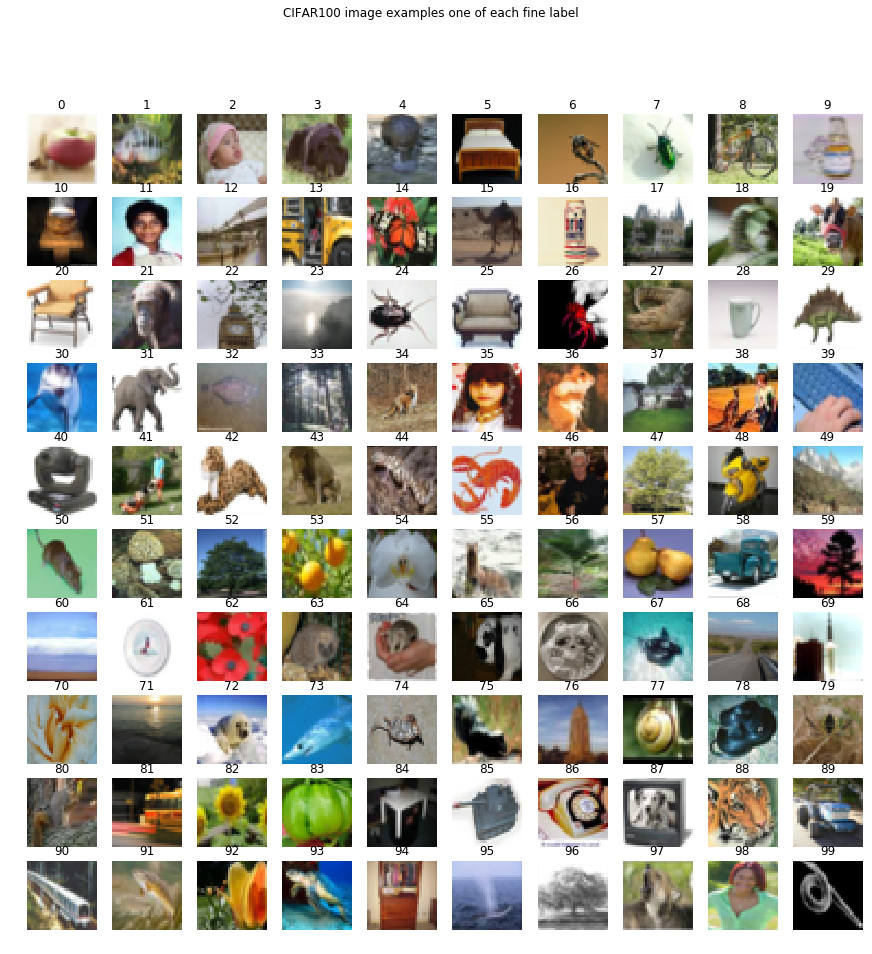

In [21]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15, 15))

for row in range(10):
    for col in range(10):
        i = row * 10 + col
        ax[row, col].imshow(X[sample_indices[i]])
        ax[row, col].set_title(Y_f[sample_indices[i]])
        ax[row, col].axis('off')

fig.suptitle('CIFAR100 image examples one of each fine label')
plt.show()

References
- [Learning Multiple Layers of Features from Tiny Images](https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf), Alex Krizhevsky, 2009
- https://github.com/guillaume-chevalier/caffe-cifar-10-and-cifar-100-datasets-preprocessed-to-HDF5
- https://github.com/rnoxy/cifar10-cnn

CIFAR100 download link:
- https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz